In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/f56/991/de5/seeds.csv")
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [3]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   grain_variety          210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [5]:
#removing categoriccal variable 
del df['grain_variety']

In [6]:
X = df.iloc[:,[3,4]].values

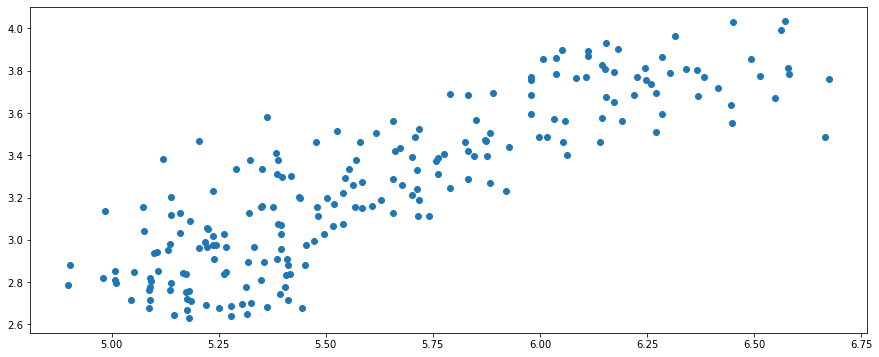

In [7]:
#Initial view of the Data
plt.figure(figsize=(15,6))
plt.scatter(X[:,0],X[:,1])

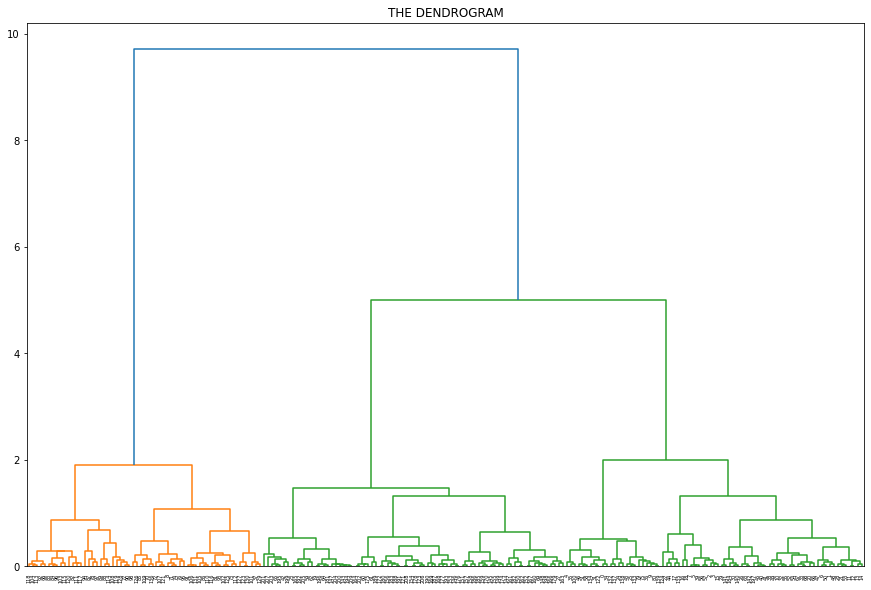

In [8]:
#Finding the optimal Clusters using the Dendrograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("THE DENDROGRAM")
plt.show()

In [9]:
#Fitting the model

from sklearn.cluster import AgglomerativeClustering
hCluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_clustering = hCluster.fit_predict(X)

In [10]:
y_clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

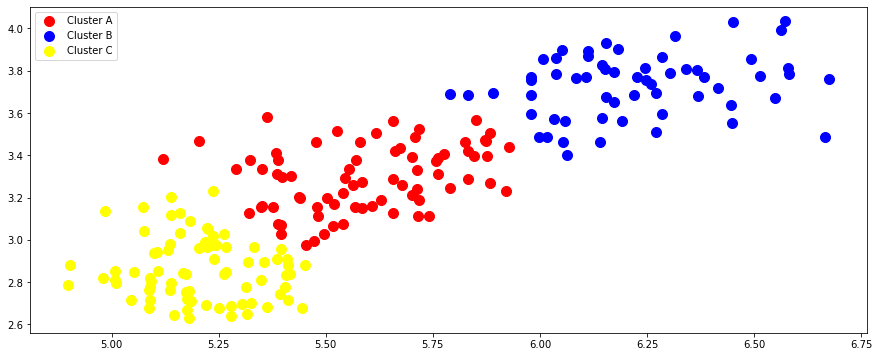

In [11]:
#Visualizing results

plt.figure(figsize=(15,6))
plt.scatter(X[y_clustering==0,0],X[y_clustering==0,1],s=100,c='red',label='Cluster A')
plt.scatter(X[y_clustering==1,0],X[y_clustering==1,1],s=100,c='blue',label='Cluster B')
plt.scatter(X[y_clustering==2,0],X[y_clustering==2,1],s=100,c='yellow',label='Cluster C')

plt.legend()